# Exploratory Data Analysis with python

python is one of the most popular tools to do data science. In this post, I will illustrate how to do exploratory data analysis using python and it's popular libraries.


## Importing Libraries

In this process, we will import all required libraries that is often used for data exploration and visualization.

In [130]:
# data wrangling
import numpy as np
import pandas as pd
from datetime import datetime
import math

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# use the inline backend to generate the plots within the browser
%matplotlib inline

## Import Data

The data come from Kiva, an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. 

The first step to do data analysis is by importing the data from our local computer or from the internet into our python environment. After we import the data, we can check the dimension of our dataset to see how many rows and column in the dataset.

In [28]:
# Import data
kiva = pd.read_csv("loan_kiva.csv")

# Display dimension of data
print("Dimension of the data (rows, columns): ", kiva.shape)

Dimension of the data (rows, columns):  (165040, 14)


To see the name of each columns and the respective data type, we can use `dtypes`.

In [35]:
kiva.dtypes

id                     int64
funded_amount          int64
loan_amount            int64
activity              object
sector                object
country               object
region                object
currency              object
partner_id             int64
posted_time           object
funded_time           object
term_in_months         int64
lender_count           int64
repayment_interval    object
dtype: object

**Data Description**

- `id`: Unique ID for loan
- `funded_amount`: The amount disbursed by Kiva to the field agent(USD)
- `loan_amount`: The amount disbursed by the field agent to the borrower(USD)
- `sector`: High level category
- `activity`: More granular category
- `use`: Exact use of loan amount
- `country`: Name of the country
- `region`: Full region name within the country
- `currenct`: The currency in which the loan was disbursed
- `partned_id`: ID of the partner organization
- `posted_time`: The time at which the loan is posted on Kiva by the field agent
- `funded_time`: The time at which the loan posted to Kiva gets funded completly by lenders
- `term_in_months`: The duration for which the loan was disbursed in months
- `lender_count`: The total number of lenders that contributed to this loan
- `repayment_interval`: Interval of the repayment method

To see the first *n* observation of our data, we can use `head`. For example, here are the first 10 observations of the dataset.

In [29]:
kiva.head(10)

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,823048,450,450,Butcher Shop,Food,Philippines,"Kabankalan, Negros Occidental",PHP,145,2015-01-01 02:38:53,2015-01-01 16:20:50,8,14,irregular
1,823138,200,200,Food Production/Sales,Food,Philippines,"Baybay, Leyte",PHP,125,2015-01-01 15:57:25,2015-01-05 00:21:31,10,5,irregular
2,823051,175,175,Fruits & Vegetables,Food,Philippines,"Kabankalan, Negros Occidental",PHP,145,2015-01-01 02:49:11,2015-01-01 06:12:18,8,4,irregular
3,823143,675,675,Fishing,Food,Philippines,"Carles, Iloilo",PHP,125,2015-01-01 16:20:43,2015-01-05 19:21:50,20,26,irregular
4,823154,1450,1450,Agriculture,Agriculture,Kenya,Webuye,KES,202,2015-01-01 19:59:25,2015-01-04 22:16:31,11,45,bullet
5,823117,250,250,Liquor Store / Off-License,Food,Philippines,"Tacloban City, Leyte",PHP,145,2015-01-01 14:14:57,2015-01-03 01:31:28,8,7,irregular
6,823100,450,450,Cloth & Dressmaking Supplies,Retail,Pakistan,Jaranwala,PKR,245,2015-01-01 12:09:06,2015-01-30 03:22:37,14,16,monthly
7,823132,900,900,Pigs,Agriculture,Philippines,"Baybay, Leyte",PHP,125,2015-01-01 15:36:55,2015-01-27 01:34:00,12,19,irregular
8,823137,225,225,Food Production/Sales,Food,Philippines,"Baybay, Leyte",PHP,125,2015-01-01 15:52:50,2015-01-03 22:37:06,12,7,irregular
9,823050,250,250,Food Production/Sales,Food,Philippines,"Kabankalan, Negros Occidental",PHP,145,2015-01-01 02:44:45,2015-01-01 04:29:02,5,7,irregular


To see the last *n* observation of our data, we can use `tail`.

In [30]:
# Display the last 6 observations
kiva.tail(10)

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
165030,1002871,500,500,Sewing,Services,El Salvador,NaN,USD,81,2015-12-31 18:30:32,2016-01-04 22:39:36,14,17,monthly
165031,1002657,650,650,Dairy,Agriculture,Tajikistan,Zafarabad,TJS,100,2015-12-31 05:28:39,2016-01-10 14:29:21,20,24,monthly
165032,1002622,5450,5450,Food Stall,Food,Guatemala,"Patulul, Suchitepequez",GTQ,55,2015-12-31 03:38:52,2016-01-28 00:38:08,14,173,monthly
165033,1002765,200,200,Grocery Store,Food,Kenya,Voi,KES,164,2015-12-31 10:56:04,2016-01-01 06:17:07,13,8,irregular
165034,1002658,225,225,Sewing,Services,Tajikistan,Tursun-zoda,TJS,63,2015-12-31 05:33:47,2015-12-31 19:47:21,14,8,monthly
165035,1002602,1500,1500,Personal Housing Expenses,Housing,Cambodia,Kampong Speu,KHR,106,2015-12-31 01:57:56,2015-12-31 21:00:58,26,56,monthly
165036,1002761,1500,1500,Farming,Agriculture,Cambodia,"Kampong Cham province, Ponhea Krek district",KHR,204,2015-12-31 10:54:52,2016-01-03 03:48:36,13,54,monthly
165037,1002668,725,725,Beauty Salon,Services,Pakistan,Lahore,PKR,247,2015-12-31 06:18:49,2016-01-27 17:52:55,13,28,monthly
165038,1002832,550,550,Food Production/Sales,Food,El Salvador,La Unión,USD,199,2015-12-31 15:26:08,2016-01-05 00:28:49,20,21,monthly
165039,1002773,500,500,Grocery Store,Food,Kenya,Voi,KES,164,2015-12-31 11:01:43,2015-12-31 22:08:27,13,12,irregular


## Data Preprocessing

### Check Missing Values

Here we will check if there is any missing values in our dataset.

In [36]:
kiva.isnull().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
region                11746
currency                  0
partner_id                0
posted_time               0
funded_time               0
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

Almost all columns except for the region contain no missing values. You can leave it as it is or you can choose to drop all observations that contain missing values like the following codes. The `inplace=True` means that the data will automatically updated and all missing values is permanently gone from the dataset.

In [38]:
kiva.dropna(inplace= True)

kiva.shape

(153294, 14)

After we remove the observations with missing values, we have around 153,000 observations left.

### Check Duplicate Data

We will also check if there is any duplicated data.

In [13]:
duplicated_row = kiva[kiva.duplicated()]

duplicated_row.shape

(0, 14)

Based on the output above, there is 0 observations that indicated as a duplicate. Therefore, we can safely conclude that there is no duplicated observations in our dataset.

### Data Transformation

Here we will convert the `posted_time` and `funded_time` columns into proper date format.

In [61]:
kiva['posted_time'] = pd.to_datetime(kiva['posted_time'])
kiva['funded_time'] = pd.to_datetime(kiva['funded_time'])

kiva.dtypes

id                             int64
funded_amount                  int64
loan_amount                    int64
activity                      object
sector                        object
country                       object
region                        object
currency                      object
partner_id                     int64
posted_time           datetime64[ns]
funded_time           datetime64[ns]
term_in_months                 int64
lender_count                   int64
repayment_interval            object
dtype: object

We will also create a new column with information of the hour, month, and weekday of the posted time. We will also create a new column that contains the time difference between the first posted time of the loan until the loan is fully funded. The funding duration will be presented as a time difference in days.

In [159]:
kiva['posted_hour'] = kiva['posted_time'].dt.hour
kiva['posted_month'] = kiva['posted_time'].dt.month
kiva['posted_day'] = pd.DatetimeIndex(kiva['posted_time']).day_name()
kiva['funding_duration'] = (kiva['funded_time'] - kiva['posted_time']).astype('timedelta64[D]')

kiva.head(5)

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,posted_hour,posted_month,posted_day,funding_duration
0,823048,450,450,Butcher Shop,Food,Philippines,"Kabankalan, Negros Occidental",PHP,145,2015-01-01 02:38:53,2015-01-01 16:20:50,8,14,irregular,2,1,Thursday,0.0
1,823138,200,200,Food Production/Sales,Food,Philippines,"Baybay, Leyte",PHP,125,2015-01-01 15:57:25,2015-01-05 00:21:31,10,5,irregular,15,1,Thursday,3.0
2,823051,175,175,Fruits & Vegetables,Food,Philippines,"Kabankalan, Negros Occidental",PHP,145,2015-01-01 02:49:11,2015-01-01 06:12:18,8,4,irregular,2,1,Thursday,0.0
3,823143,675,675,Fishing,Food,Philippines,"Carles, Iloilo",PHP,125,2015-01-01 16:20:43,2015-01-05 19:21:50,20,26,irregular,16,1,Thursday,4.0
4,823154,1450,1450,Agriculture,Agriculture,Kenya,Webuye,KES,202,2015-01-01 19:59:25,2015-01-04 22:16:31,11,45,bullet,19,1,Thursday,3.0


# Exploratory Data Analysis

In this part we will explore the data and find new insight by doing data aggregation and data visualization.

## Data by Sector

First we will look at which sector that has the most amount of loan request. To do this, we group the data based on the column `sector` and count how many data in each sector. After that, we sort the data descendingly from the highest to lowest.

In [123]:
kiva_agg = kiva['sector'].groupby(kiva['sector']).count().sort_values(ascending=False)

kiva_agg

sector
Agriculture       43396
Food              32109
Retail            29500
Services           9715
Personal Use       7498
Clothing           6886
Education          6875
Housing            5524
Transportation     3871
Arts               2646
Health             1741
Manufacturing      1666
Construction       1512
Wholesale           191
Entertainment       164
Name: sector, dtype: int64

There are a lot of loan requests that come from the **agriculture, food, and retail** sector. We can visualize the result using a simple bar chart.

<AxesSubplot:xlabel='sector'>

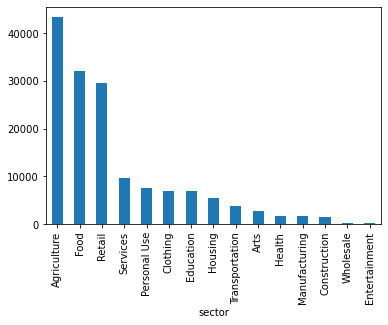

In [131]:
kiva_agg.plot(kind='bar')

Let's check the top 10 activities from the **agriculture** sector.

In [149]:
kiva_agr = kiva.query('sector == "Agriculture"')

kiva_agg = kiva_agr['activity'].groupby(kiva_agr['activity']).count().nlargest(10)

kiva_agg

activity
Farming          16269
Pigs              7220
Agriculture       6203
Livestock         3508
Dairy             2538
Poultry           2501
Animal Sales      2348
Cattle            1480
Farm Supplies      965
Flowers            241
Name: activity, dtype: int64

<AxesSubplot:xlabel='activity'>

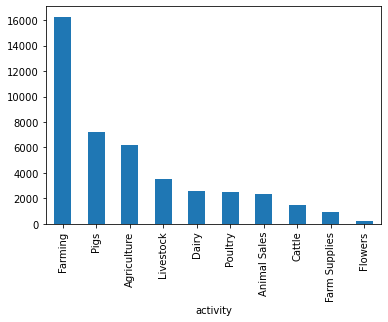

In [150]:
kiva_agg.plot(kind = 'bar')

## Relation Between Amount of Loan with Number of Lender

We will see if there is any interesting pattern between amount of loan requested with the number of lender. Does a higher amount of loan will need a lot more lender count?

Text(0, 0.5, 'Loan Amount')

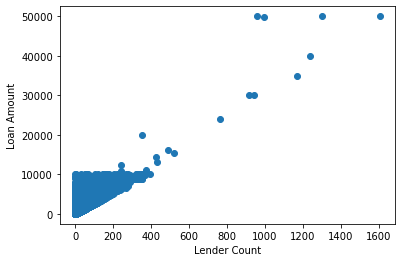

In [151]:
plt.scatter(kiva['lender_count'], kiva['loan_amount'])
plt.xlabel('Lender Count')
plt.ylabel('Loan Amount')

Based on the scatterplot, most of the loan request has no more than 400 lenders with amount of loan less than USD 10,000. It also looks like that higher amount of loan requested is positively correlated with the number of lender.

## Duration to Get Fully Funded

Next, let's inspect the average duration from posting the loan to get fully funded.

In [160]:
kiva['funding_duration'].mean()

14.076950174175115

The average duration between posting the loan until get fully funded is 14 days. We can get the full statistics using `describe()`.

In [161]:
kiva['funding_duration'].describe()

count    153294.00000
mean         14.07695
std          11.65286
min           0.00000
25%           4.00000
50%          10.00000
75%          24.00000
max          68.00000
Name: funding_duration, dtype: float64

We will further inspect the funding duration by looking at the average funding duration for each month of the year to see if the funding duration stay constant or get fluctuated around the year. 

Text(0.5, 1.0, 'Average Funding Duration in Days')

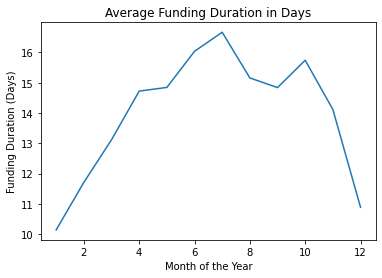

In [216]:
kiva_agg = kiva['funding_duration'].groupby(kiva['posted_month']).mean()

plt.plot(kiva_agg)
plt.xlabel("Month of the Year")
plt.ylabel('Funding Duration (Days)')
plt.title('Average Funding Duration in Days')

It looks like the funding duration reach its peak during the mid-year between June and August. Let's further inspect the average funding duration for the top 3 sectors.

In [217]:
kiva_top = kiva['sector'].isin(['Agriculture', 'Food', 'Retail'])
kiva_top = kiva[kiva_top]

kiva_agg = kiva_top.groupby(['sector', 'posted_month']).agg({'funding_duration': ['mean']}).reset_index()

kiva_agg

,sector,posted_month,funding_duration
,,,mean
0,Agriculture,1,10.852416
1,Agriculture,2,13.095532
2,Agriculture,3,14.620456
3,Agriculture,4,17.374230
4,Agriculture,5,15.928708
5,Agriculture,6,17.166304
6,Agriculture,7,18.955479
7,Agriculture,8,16.531427
8,Agriculture,9,16.216208


We can transform the data using `pivot` for proper visualization.

In [218]:
kiva_pivot = kiva_agg.pivot(index = 'posted_month', columns='sector')

kiva_pivot

funding_duration                      
                         mean                      
sector            Agriculture       Food     Retail
posted_month                                       
1                   10.852416   9.915738  10.138128
2                   13.095532   9.674961  11.369565
3                   14.620456  11.808905  12.904046
4                   17.374230  12.989495  14.038752
5                   15.928708  14.291176  14.978748
6                   17.166304  15.839201  16.890060
7                   18.955479  16.849428  16.952623
8                   16.531427  15.946180  16.942586
9                   16.216208  15.005869  16.259464
10                  16.714121  17.096829  17.319755
11                  14.921225  14.752832  15.178625
12                  11.586014  10.755133  12.095238

Finally, we draw the line chart for each sectors.

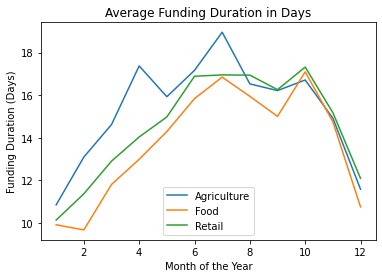

In [227]:
kiva_pivot.plot()
plt.xlabel('Month of the Year')
plt.ylabel('Funding Duration (Days)')
plt.title('Average Funding Duration in Days')
plt.legend(kiva_agg['sector'].unique())

Let's check if this correlate with the number of loan requested by month.

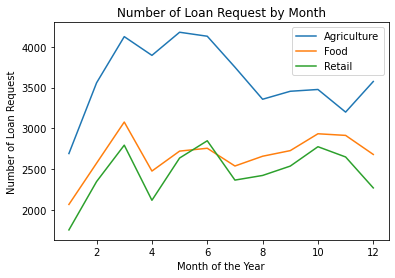

In [237]:
kiva_agg = kiva_top.groupby(['posted_month', 'sector']).agg({'id': ['count']}).reset_index()

kiva_pivot = kiva_agg.pivot(index = 'posted_month', columns = 'sector')

kiva_pivot.plot()
plt.xlabel('Month of the Year')
plt.ylabel('Number of Loan Request')
plt.title('Number of Loan Request by Month')
plt.legend(kiva_agg['sector'].unique())

The number of loan requested for **Food** and **Retail** sectors are relatively constant througouh the year while the **Agriculture** sector tend to decrease after the mid-year.